In [14]:
import tensorflow as tf
print(tf.__version__)

class callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy') >= 0.998):
      print("\n Reached 99.8% accuracy so stopping training!")
      self.model.stop_training = True

callback = callback()
      
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images.reshape(60000,28,28,1)
training_images = training_images / 255.0

test_images = test_images.reshape(10000,28,28,1)
test_images = test_images / 255.0

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128,activation="relu"),
                                    tf.keras.layers.Dense(10,activation="softmax")
])

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(training_images,training_labels,epochs=10,callbacks=[callback])
test_loss, test_accuracy = model.evaluate(test_images,test_labels)
print("Test Accuracy: " + str(test_accuracy))

2.3.0
Epoch 1/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1491 - accuracy: 0.9553
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0497 - accuracy: 0.9848
Epoch 3/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0319 - accuracy: 0.9898
Epoch 4/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0205 - accuracy: 0.9935
Epoch 5/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0146 - accuracy: 0.9955
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0110 - accuracy: 0.9966
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0066 - accuracy: 0.9980
Epoch 8/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0063 - accuracy: 0.9980
Epoch 9/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0050 - accuracy: 0.9983
 Reached 99.8% accuracy so stopping training!
313/313 [=========

Experimented different combinations of the models and performed the exercises:
1. With decrease in the number of filters (64,32,16), the time taken to train the model also decreases. The accuracy is slightly affected.
2. Adding more convolutions: with 3 convolutions, the training time increases slightly and the accuracy is decreases, 4 convolutions are not possible because of negative dimensions of the image. 
3. Removing convolutions: The training time is increased and accuracy is improved.(3 convolutions to 2 convolutions)
4. Removing all convolutions but the first one, or having only one convolution in the model: the training time is decreased, the training accuracy is improved but the test accuracy decreases by almost 1%.
5. Removing the 128 units' hidden layer in the FCN: the training time is reduced, and the training accuracy is also decreased.
6. Increasing the epochs: Increases the training accuracy but more epochs might cause overfitting.

Added a callback to the model so that when the accuracy reaches a particular value, the training stops.


# Experiments with filters and pool

In [151]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import misc

# Select an image form scipy like we did from sklearn yesterday
i = misc.ascent()


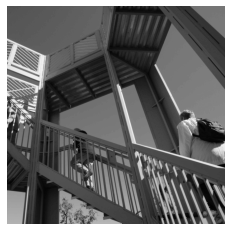

(512, 512)


In [152]:
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()
print(i.shape)

In [153]:
# Making a copy of the exisiting image
i_transformed = np.copy(i)

# Getting the dimensions of the image
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]


In [154]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.

# Experiment with different values for fun effects.
sharp_filter = np.array([ [0, 1, 0], [1, -4, 1], [0, 1, 0]])

# A couple more filters to try for fun!
# HORIZONTAL SOBEL FILTER
horizontal_sobel_filter = np.array([ [-1, -2, -1], [0, 0, 0], [1, 2, 1]])
# VERTICAL SOBEL FILTER
vertical_sobel_filter = np.array([ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

# HORIZONTAL PREWITT FILTER
horizontal_prewitt_filter = np.array([ [-1, -1, -1], [0, 0, 0], [1, 1, 1]])
# VERTICAL PREWITT FILTER
vertical_prewitt_filter = np.array([ [-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

In [155]:
# x is the ROW (height)
# y is the COLUMN (width)

# Remember these x and y, they are not similar to the coordinate axes x and y.
# x rows and y columns 
# if you want to think in coordinate axes terms then x is y and y is x :)

# 1 and size-1 is done to leave 1 pixel margin so as to perform the
# multiplication
def convolution_function(filter): 
  for x in range(1, size_x - 1):
    for y in range(1, size_y - 1):
      convolution = 0.0
      # First row multiplied (row means x should be constant)
      convolution = convolution + (i[x-1, y-1] * filter[0, 0])
      convolution = convolution + (i[x-1, y]   * filter[0, 1])
      convolution = convolution + (i[x-1, y+1] * filter[0, 2])
      # Second row multiplied (row means x should be constant)
      convolution = convolution + (i[x, y-1]   * filter[1, 0])
      convolution = convolution + (i[x, y]     * filter[1, 1])
      convolution = convolution + (i[x, y+1]   * filter[1, 2])
      # Third row multiplied (row means x should be constant)
      convolution = convolution + (i[x+1, y-1] * filter[2 ,0])
      convolution = convolution + (i[x+1, y]   * filter[2 ,1])
      convolution = convolution + (i[x+1, y+1] * filter[2 ,2])
      # Multiplying the valye with weight and ensuring it is below 255
      convolution = convolution * weight
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      # Loading the new value into the transformed image
      i_transformed[x, y] = convolution

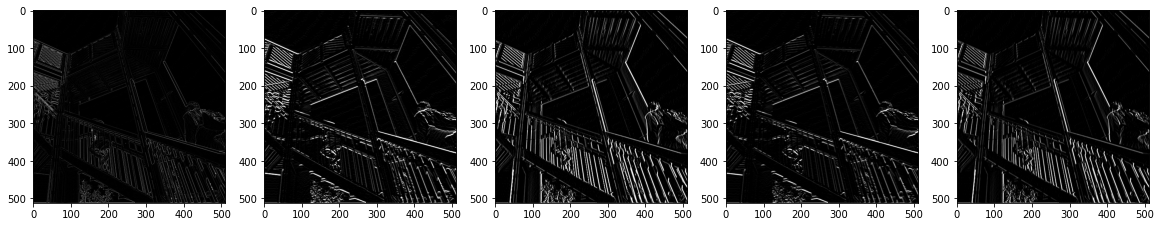

In [165]:
f, ax = plt.subplots(1,5,figsize=(20,4))
filters = [sharp_filter, horizontal_sobel_filter, vertical_sobel_filter,
           horizontal_prewitt_filter,vertical_prewitt_filter]

for fi in range(5):
  convolution_function(filter=filters[fi])
  ax[fi].imshow(i_transformed)

The images are 512 x 512 in dimension because we applied convolutions leaving a pixel and so it is basically a same convolution.

In [133]:
#    convolution = convolution + (i[x-1, y-1] * filter[0, 0])
#    convolution = convolution + (i[x, y-1]   * filter[0, 1])
#    convolution = convolution + (i[x+1, y-1] * filter[0, 2])
#    convolution = convolution + (i[x-1, y]   * filter[1, 0])
#    convolution = convolution + (i[x, y]     * filter[1, 1])
#    convolution = convolution + (i[x+1, y]   * filter[1, 2])
#    convolution = convolution + (i[x-1, y+1] * filter[2 ,0])
#    convolution = convolution + (i[x, y+1]   * filter[2 ,1])
#    convolution = convolution + (i[x+1, y+1] * filter[2 ,2])

NOTE: The above lines are what was written by Laurence Moroney in the exercise notebook, this code is a bit wrong because it applies the filter in a different manner as you can see the y value is not changing so the multiplication is between the first column of the image and first row of the filter, then second column and second row and lastly third column and third row. The correct implementation should multiply the row of the image and the row of the column, which has been done in the above function. Laurence's implementation is not completely wrong it's just that, we think we are applying a vertical filter and detecting the vertical edges but in reality that detects the horizontal edges. So caution there.

In [164]:
# This is what is happening in the convolution
print(i[:3,:3])
print("x")
print(horizontal_sobel_filter)
print("=")
print(i[:3,:3] * horizontal_sobel_filter) 

[[83 83 83]
 [82 82 83]
 [80 81 83]]
x
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]
=
[[ -83 -166  -83]
 [   0    0    0]
 [  80  162   83]]


Applying pooling.


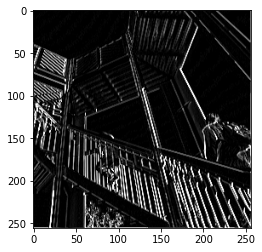

In [168]:
# dimensions of the image after pooling
new_x = int(size_x/2)
new_y = int(size_y/2)

# imagine
# ---------
# | a | b |
# ---------
# | c | d |
# ---------
# This is the max pooling box
new_image = np.zeros((new_x,new_y))

# Using a step value of 2
for x in range(0, size_x, 2):
  for y in range (0, size_y, 2):
    pixels = []
    # a
    pixels.append(i_transformed[x,y])
    # b
    pixels.append(i_transformed[x,y+1])
    # c
    pixels.append(i_transformed[x+1,y])
    # d
    pixels.append(i_transformed[x+1,y+1])
    # Max Pooling 
    new_image[int(x/2),int(y/2)] = max(pixels)

plt.gray()
plt.grid(False)
plt.imshow(new_image)
#plt.axis('off')
plt.show() 

Notice how the dimensions have been halved and the image is now 256 x 256 pixels. Even with the change in the dimensions, the features are preserved.

#Using Real World Images

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-09-09 14:04:26--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 172.217.203.128, 74.125.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   130MB/s    in 1.1s    

2020-09-09 14:04:28 (130 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



Getting the data and storing it in the 'tmp' folder. Using the os and zipfile libraries to access the OS and unzip to data.

In [3]:
import os 
import zipfile

local_zip = '/tmp/horse-or-human.zip'
# reading the data from the local zip using the zipfile library
zip_ref = zipfile.ZipFile(local_zip, 'r')
# Extracting the data from the zip file to the horse-or-human folder
zip_ref.extractall('/tmp/horse-or-human')


Now let us check the directories in our folder and see the image names.

In [15]:
# Directory with horse images
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with human images 
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# train_horse_dir and train_human_dir are just DIRECTORY NAMES
# print(train_human_dir)

In [16]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:5])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:5])

# listdir() returns a list containing the names of the entries
# in the directory given by path

# You could also do like this
# train_horse = os.listdir('/tmp/horse-or-human/horses')
# print(train_horse[:5])

['horse27-6.png', 'horse03-6.png', 'horse14-5.png', 'horse22-1.png', 'horse06-4.png']
['human03-24.png', 'human06-04.png', 'human07-23.png', 'human06-05.png', 'human01-20.png']


In [17]:
# Total number of images
print("Training images of horses: ", len(os.listdir(train_horse_dir)))
print("Training images of humans: ", len(os.listdir(train_human_dir)))

Training images of horses:  500
Training images of humans:  527


Let's actually have a look at the images so we know what we are dealing with. We are going to print a 4 x 4 grid with 8 images of horses and 8 images of humans.

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

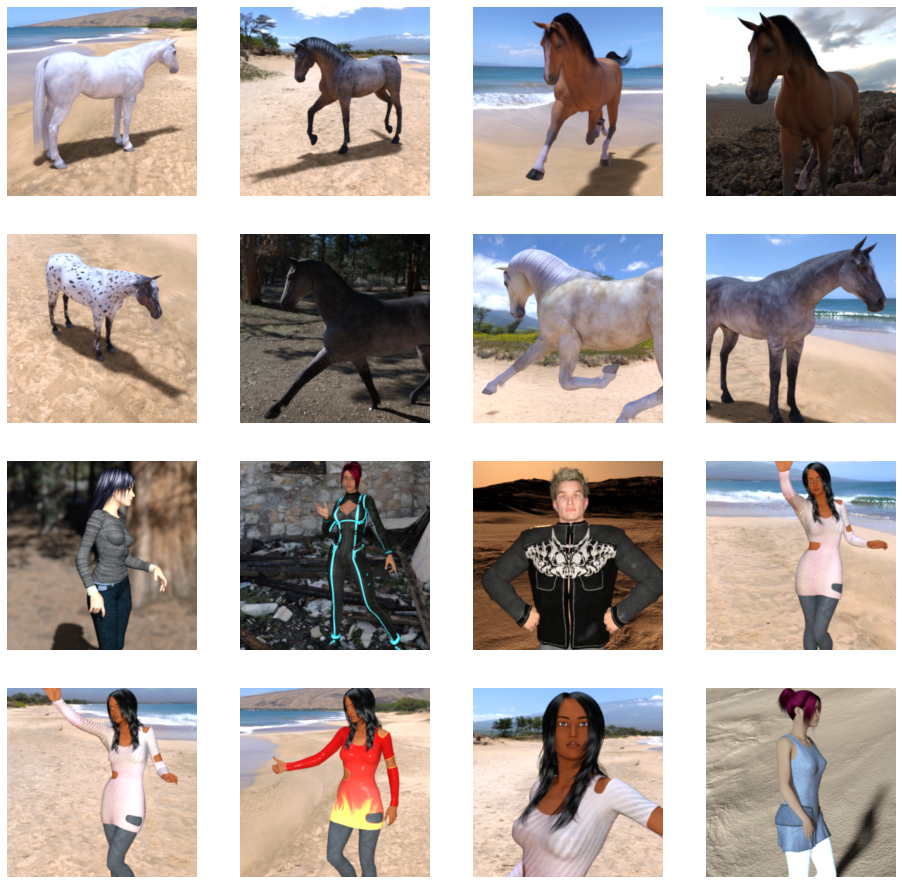

In [20]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix + next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [21]:
import tensorflow as tf
rw_train_model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [23]:
rw_train_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [25]:
from tensorflow.keras.optimizers import RMSprop

rw_train_model.compile(optimizer=RMSprop(lr=0.001),
              loss="binary_crossentropy",
              metrics=["accuracy"])

# binary_crossentropy because this is a binary classifier

Till now we didn't actually save the images in a training_set so now we will use ImageDataGenerator to automatically load the images and give them labels according to their subdirectory names.

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the [0, 1] range (originally all values are in the [0, 255] range).

In Keras this can be done via the keras.preprocessing.image.ImageDataGenerator class using the rescale parameter. This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory). These generators can then be used with the Keras model methods that accept data generators as inputs: fit, evaluate_generator, and predict_generator.

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [27]:
history = rw_train_model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 64s 8s/step - loss: 0.8630 - accuracy: 0.5017
Epoch 2/15
8/8 [==============================] - 65s 8s/step - loss: 1.2198 - accuracy: 0.5606
Epoch 3/15
8/8 [==============================] - 74s 9s/step - loss: 0.6117 - accuracy: 0.6953
Epoch 4/15
8/8 [==============================] - 64s 8s/step - loss: 0.6263 - accuracy: 0.6963
Epoch 5/15
8/8 [==============================] - 64s 8s/step - loss: 0.5209 - accuracy: 0.8031
Epoch 6/15
8/8 [==============================] - 64s 8s/step - loss: 0.3327 - accuracy: 0.8710
Epoch 7/15
8/8 [==============================] - 64s 8s/step - loss: 0.4080 - accuracy: 0.8142
Epoch 8/15
8/8 [==============================] - 74s 9s/step - loss: 0.2276 - accuracy: 0.9177
Epoch 9/15
8/8 [==============================] - 64s 8s/step - loss: 0.3033 - accuracy: 0.8865
Epoch 10/15
8/8 [==============================] - 64s 8s/step - loss: 0.5068 - accuracy: 0.8376
Epoch 11/15
8/8 [======================

Now inorder to test our model let's upload our own images and check how it performs.

In [41]:
import numpy as np
# Exclusive to colab
from google.colab import files
from keras.preprocessing import image

def image_upload():

  uploaded = files.upload()

  for fn in uploaded.keys():
  
    # predicting images
    path = '/content/' + fn
    img = image.load_img(path, target_size=(300, 300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = rw_train_model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
      print(fn + " is a human")
    else:
      print(fn + " is a horse")
      
image_upload()

It doesnot perform so well because we just have 1000 images which are computer-generated and our uploaded images are real images. But still it is good.

## Adding validation to our model

As we did for the train set we will download, unzip and load the validation images using the ImageDataGenerator.

In [28]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-09-09 15:03:14--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.139.128, 173.194.210.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.139.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2020-09-09 15:03:14 (97.4 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [30]:
import os 
import zipfile

local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')

In [32]:
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

validation_horse_names = os.listdir(validation_horse_dir)
validation_human_names = os.listdir(validation_human_dir)

print(validation_horse_names[:5])
print(validation_human_names[:5])

print()

print("Validation images of horses: ", len(os.listdir(validation_horse_dir)))
print("Validation images of humans: ", len(os.listdir(validation_human_dir)))

['horse1-241.png', 'horse1-122.png', 'horse1-384.png', 'horse6-218.png', 'horse5-519.png']
['valhuman05-20.png', 'valhuman02-04.png', 'valhuman03-11.png', 'valhuman04-03.png', 'valhuman05-13.png']

Validation images of horses:  128
Validation images of humans:  128


Let's make another model with the same parameters and layers.

In [35]:
rw_model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [37]:
rw_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)       

In [38]:
from tensorflow.keras.optimizers import RMSprop

rw_model.compile(optimizer=RMSprop(lr=0.001),
                 loss="binary_crossentropy",
                 metrics=["accuracy"])

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 32 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 256 images belonging to 2 classes.


Now let's fit the model to the data but this time we will also pass the validation data to see how well our model is performing.

In [40]:
rw_model.fit(train_generator,
             steps_per_epoch=8,
             epochs=15,
             validation_data=validation_generator,
             validation_steps=8
             )
# steps_per_epoch is number of batches in each epoch
# for our train_generator we had 128 as the batch size
# so 8 x 128 = 1024, the number of train images we have
# validation_steps is nubmber of batches in each epoch for validation data
# so 8 x 32 = 256, the number of validation images we have

Epoch 1/15
8/8 [==============================] - 70s 9s/step - loss: 0.8127 - accuracy: 0.5395 - val_loss: 0.6702 - val_accuracy: 0.6953
Epoch 2/15
8/8 [==============================] - 70s 9s/step - loss: 0.6519 - accuracy: 0.6685 - val_loss: 0.8085 - val_accuracy: 0.7500
Epoch 3/15
8/8 [==============================] - 72s 9s/step - loss: 1.8965 - accuracy: 0.8376 - val_loss: 0.6263 - val_accuracy: 0.8203
Epoch 4/15
8/8 [==============================] - 70s 9s/step - loss: 0.3190 - accuracy: 0.8932 - val_loss: 0.9801 - val_accuracy: 0.8242
Epoch 5/15
8/8 [==============================] - 70s 9s/step - loss: 0.4217 - accuracy: 0.8498 - val_loss: 1.0418 - val_accuracy: 0.7891
Epoch 6/15
8/8 [==============================] - 75s 9s/step - loss: 0.1666 - accuracy: 0.9399 - val_loss: 1.4462 - val_accuracy: 0.8164
Epoch 7/15
8/8 [==============================] - 83s 10s/step - loss: 0.1587 - accuracy: 0.9399 - val_loss: 1.6728 - val_accuracy: 0.7852
Epoch 8/15
8/8 [=================

We can test again by calling the image_upload() function

In [42]:
image_upload()

One more experiment that we can do is compress the images and see how our model performs, compress in the sense reducing the dimensions of the image to 150 x 150 from 300 x 300.
Change the dimensions in 3 places: input_shape in the first layer of the model and the target_size in both train_generator and test_generator. Also, make sure you remove some convolutions to avoid having a negative dimension error.



I won't do that. What I will do is visualize how the filters (feature map) in each layer are processing the images. Similar to what we did in DLDay1 by visualizing the fashion mnist images. There is going to be a lot more stuff here because we need to normalize the images and stuff. But getting a model to output each layer is the same.
We have all images instead of 3
and all convolutions instead of 1.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


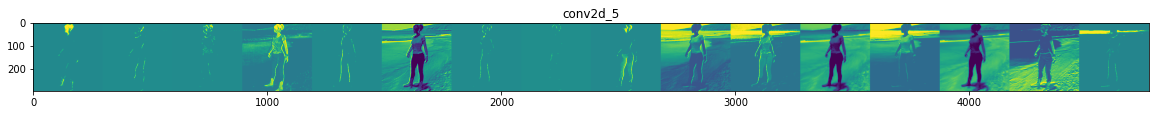

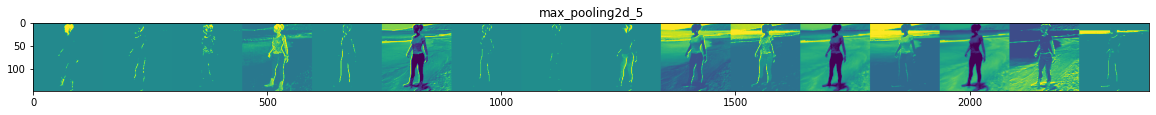

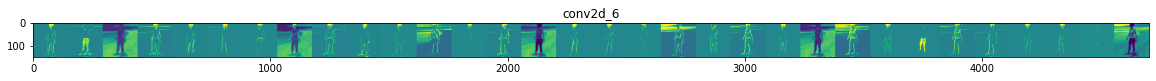

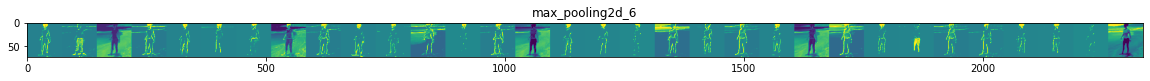

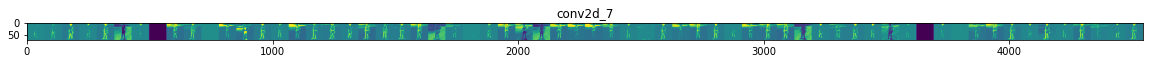

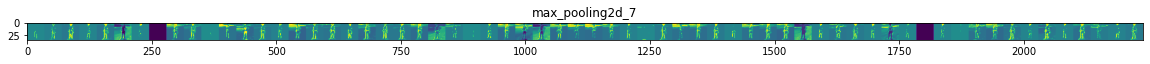

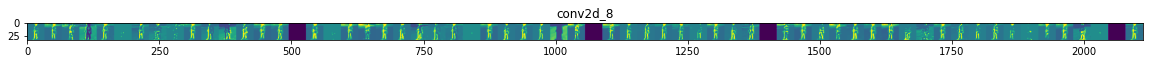

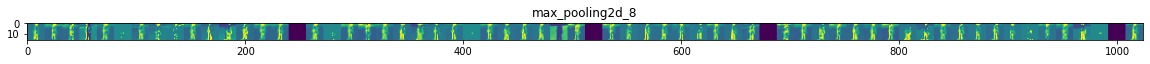

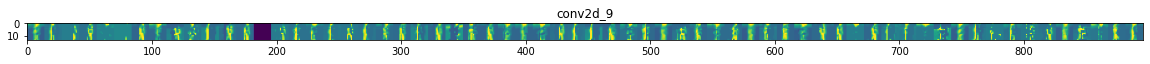

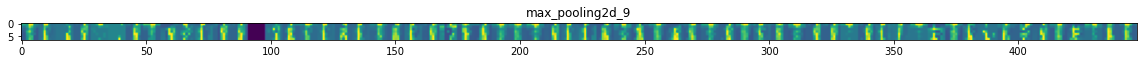

In [53]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
layer_outputs = [layer.output for layer in rw_model.layers]
#visualization_model = Model(img_input, layer_outputs)
visualization_model = tf.keras.models.Model(inputs = rw_model.input, outputs = layer_outputs)

# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in rw_model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    # 4 because the shape is (1, 148, 148, 3) so 4
    # OR you could just do rw_model.layers[:-3] and remove this if statement
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

To free the resources and end the session run the cell below.

In [52]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)


Notebook credits: Laurence Moroney, deeplearning.ai and I
